# Table Content
1.[Importing Libraries](#import)<br>
2.[Reading Data](#read)<br>
3.[Data wrangling](#data)<br>
4.[Feature Engineering](#feature)<br>
5.[ML-Catboost Model](#cat)<br>

<font color='blue'><h1>Importing Libraries</font></h1><a class='anchor' id='import'></a>

In [10]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<font color='red'><h1>Reading Data</font></h1><a class='anchor' id='read'></a>

In [12]:
df=pd.read_csv("C:\\Users\\HP\\AppData\\Local\\Temp\\Rar$DI51.528\\PUBG_Game_Prediction_data.csv")

In [14]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [81]:
df.shape

(4438022, 40)

<font color="yellow"><h1>Data Wrangling</font></h1><a class='anchor' id='data'></a>

### check for rows with missing win prediction value

In [16]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [17]:
df.drop(2744604,inplace=True)

In [23]:
df['playerJoined']=df.groupby('matchId')['matchId'].transform('count')

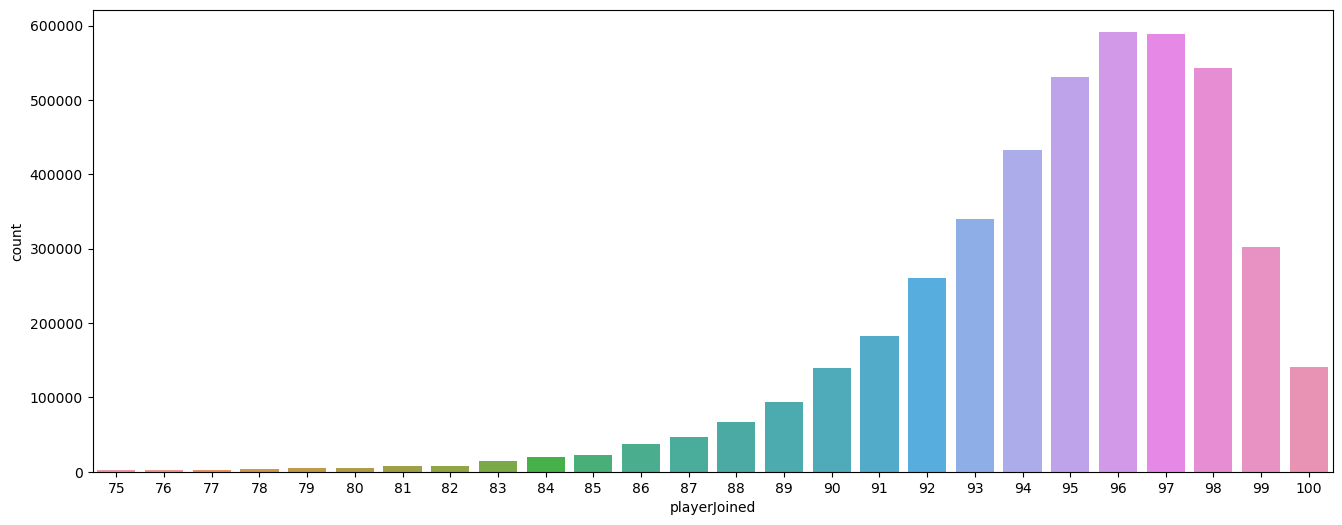

In [28]:
sns.countplot(df[df['playerJoined']>=75]['playerJoined'])
plt.show()

### Kill Without Moving

In [30]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))


In [31]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [32]:
df[df['killswithoutMoving'] == True].shape

(1535, 32)

In [33]:
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

### Extra-ordinary road kills

In [36]:
df[df['roadKills']>5].shape

(46, 32)

In [37]:
df.drop(df[df['roadKills']>5].index,inplace=True)

### How many roadkills

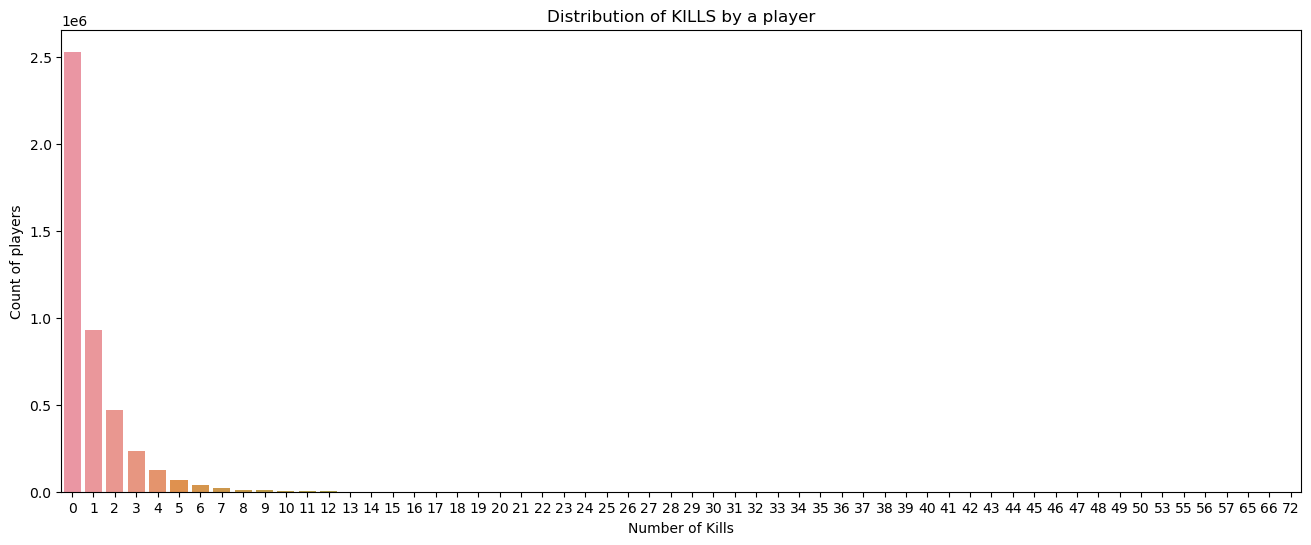

In [38]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

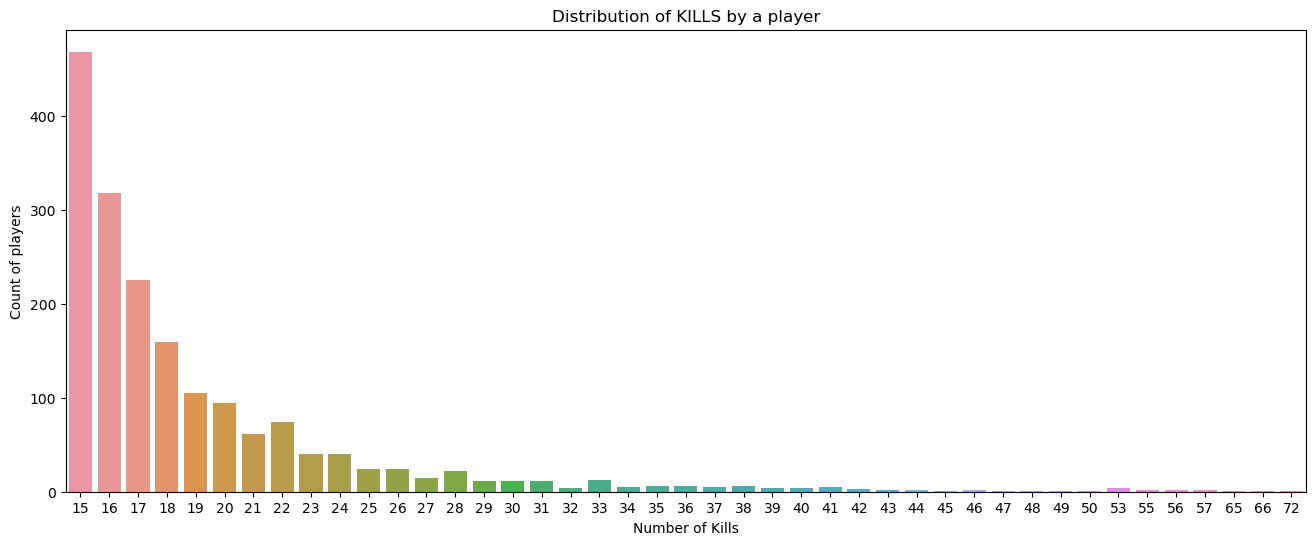

In [39]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [40]:
df[df['kills']>20].shape

(417, 32)

In [41]:
df.drop(df[df['kills']>20].index,inplace=True)

### Head Shot

In [42]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

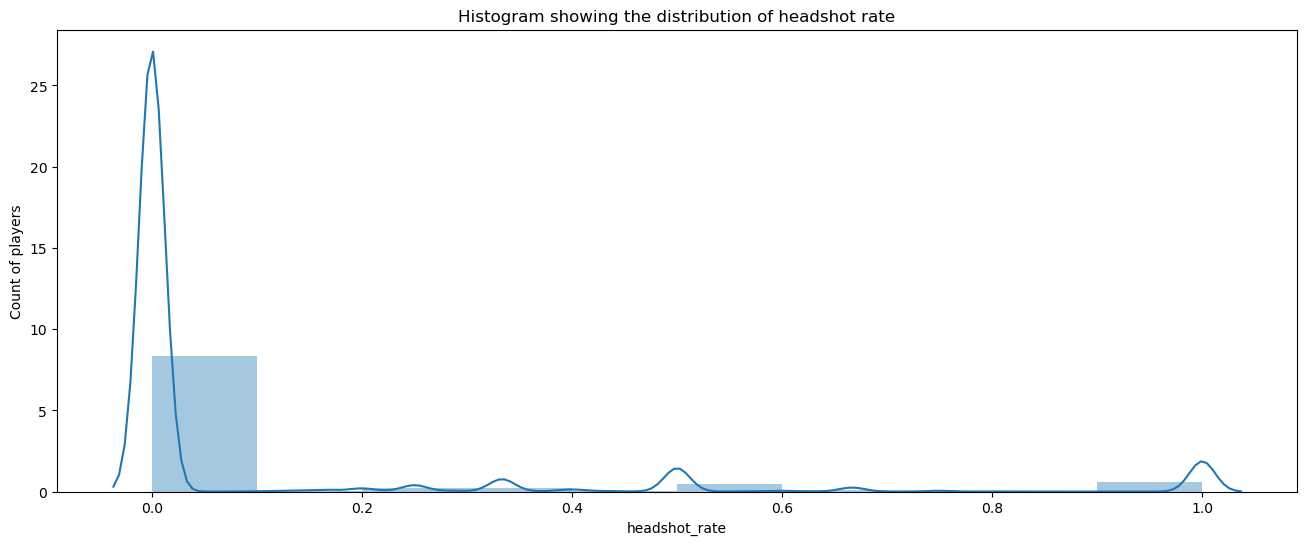

In [43]:
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


In [44]:
df[(df['headshot_rate']==1)&(df['kills']>5)].shape

(187, 33)

In [45]:
df.drop(df[(df['headshot_rate']==1)&(df['kills']>6)].index,inplace=True)

### Longest Shot

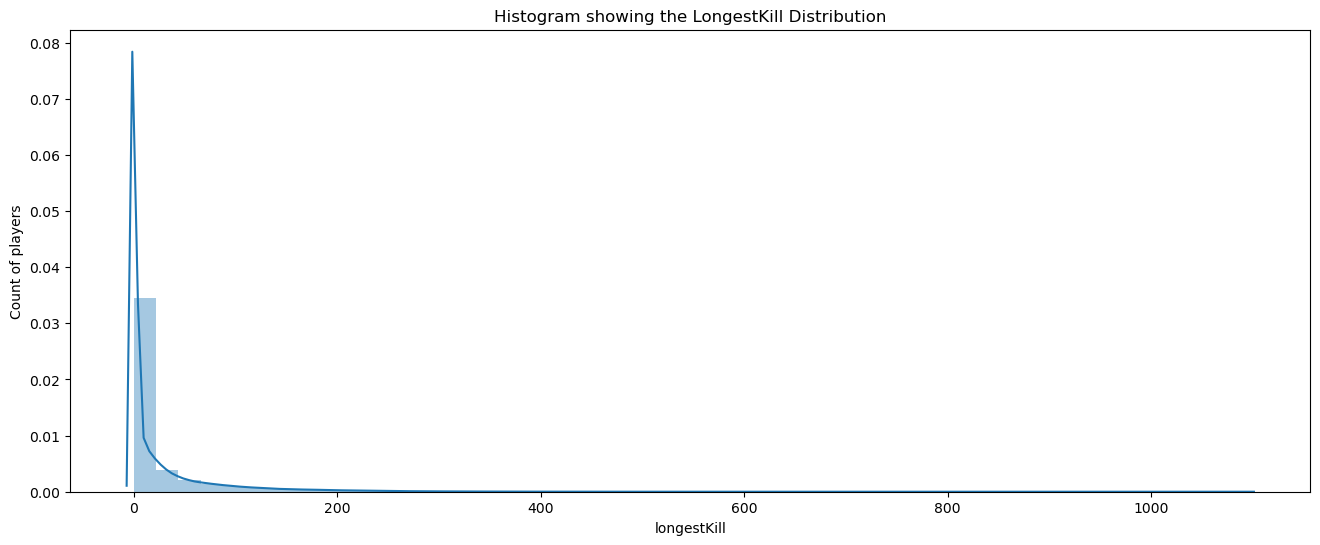

In [46]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [48]:
df[df['longestKill']>=500].shape

(1747, 33)

In [ ]:
df.drop(df[df['longestKill']>=500].index.inplace=True)

### Weapon Change

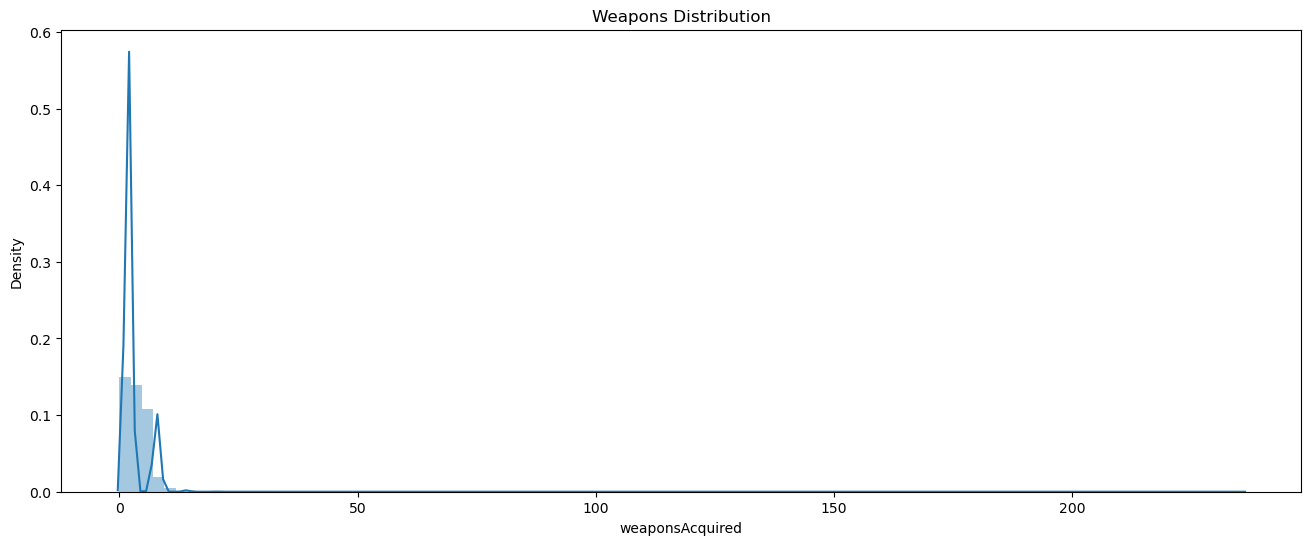

In [49]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [50]:
df[df['weaponsAcquired']>=15].shape

(6840, 33)

In [51]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

#### EDA

In [52]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playerJoined          0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

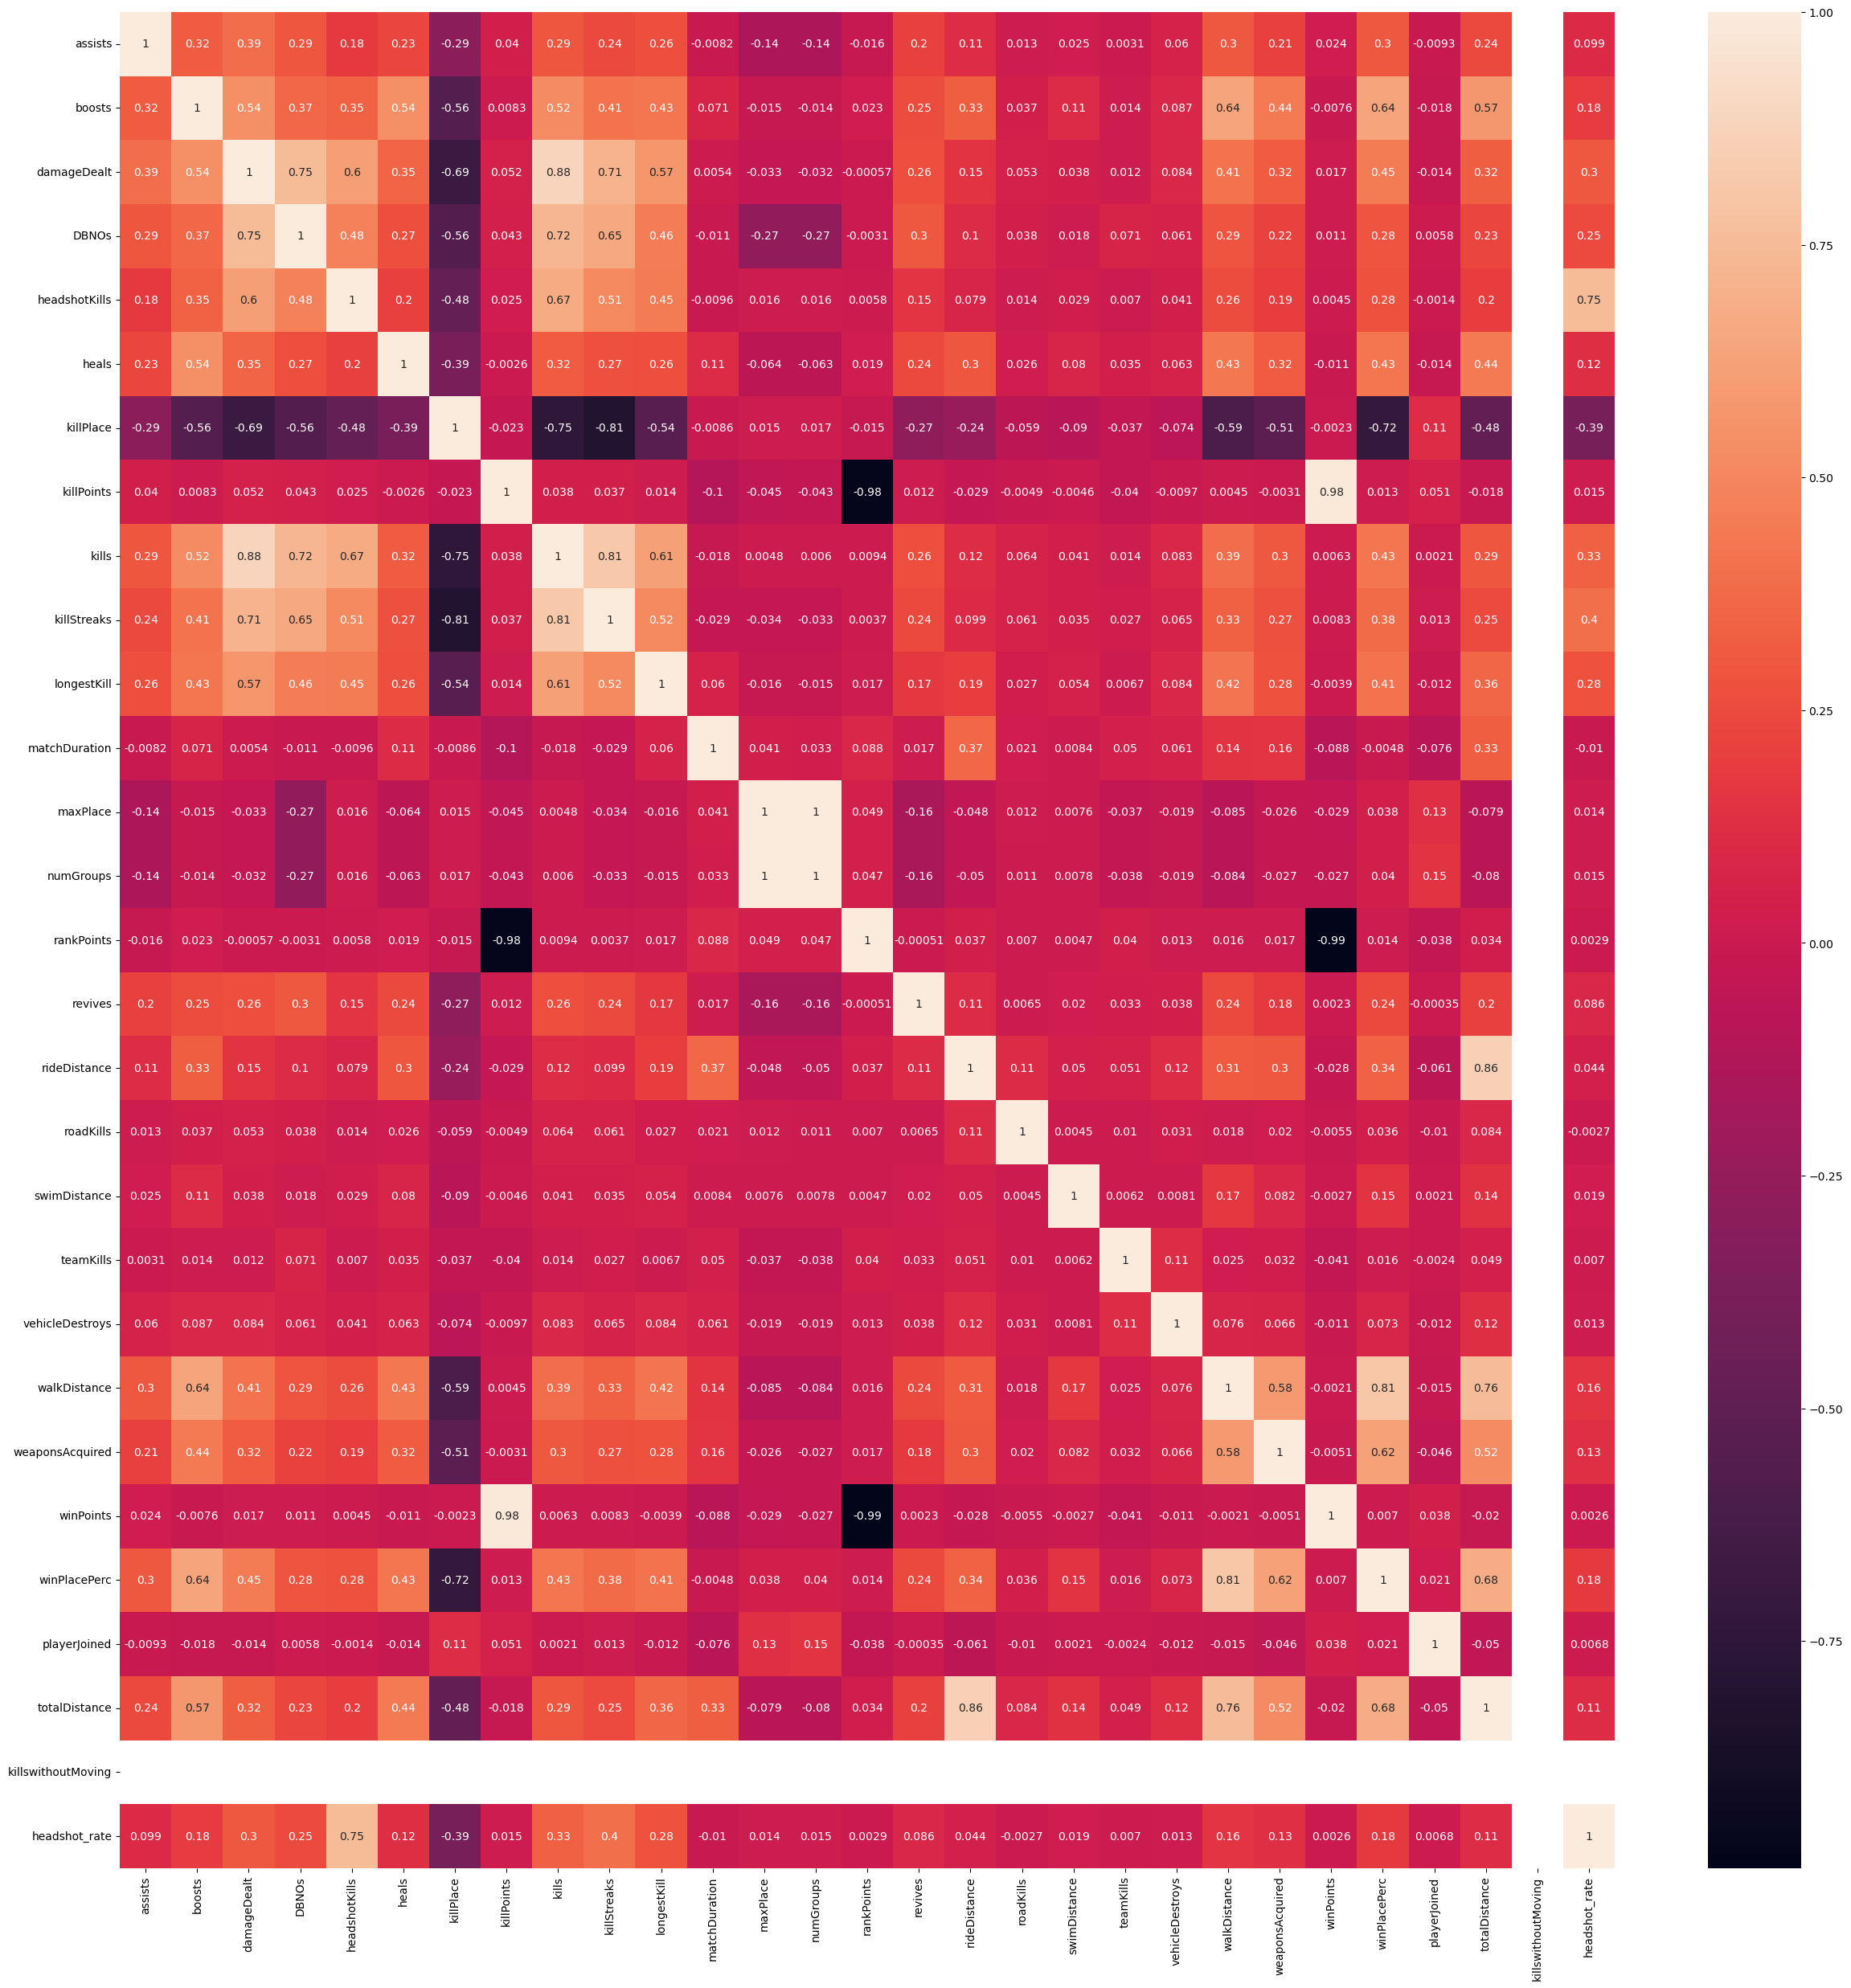

In [53]:
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

<font color="cyan"><h1>Feature Engineering</font></h1><a class='anchor' id='feature'></a>

In [55]:
normalising_factor = (100 - df['playerJoined']/100)+1

In [56]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor

In [57]:
df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [58]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [59]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])


In [60]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


<font color='pink'><h1>ML-Catboost Model</font></h1><a class='anchor' id='cat'></a>

### Handling Categorical Data

In [61]:
x = data.drop(['winPlacePerc'], axis = 1)

In [62]:
y = data['winPlacePerc']
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [63]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [64]:
x.shape

(4438022, 40)

In [65]:
features=x.columns

### Scaling the data

In [66]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [67]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.581646,-0.382651,0.449801,1.172384,-0.765272,-0.450991,-0.732784,-1.212337,-0.04962,-0.142535,...,-0.033608,-0.005265,-0.0138,-0.00829,-0.054411,-0.206507,-0.370742,-0.405222,1.236255,0.0
1,-0.581646,-0.382651,0.340536,-0.804758,-0.765272,-0.450991,-0.775760,0.803578,-0.04962,-0.142535,...,-0.033608,-0.005265,-0.0138,-0.00829,-0.054411,-0.206507,-0.370742,-0.405222,1.236255,0.0
2,-0.581646,-0.382651,-0.023679,-0.804758,-0.765272,-0.450991,0.169711,0.813080,-0.04962,-0.142535,...,-0.033608,-0.005265,-0.0138,-0.00829,-0.054411,-0.206507,-0.370742,-0.405222,-0.808895,0.0
3,-0.581646,-0.382651,0.996124,-0.804758,-0.765272,-0.450991,-0.560880,0.700406,-0.04962,-0.142535,...,-0.033608,-0.005265,-0.0138,-0.00829,-0.054411,-0.206507,-0.370742,-0.405222,1.236255,0.0
4,-0.581646,-0.382651,-0.096522,-0.804758,0.646626,0.701842,2.232556,0.906749,-0.04962,-0.142535,...,-0.033608,-0.005265,-0.0138,-0.00829,-0.054411,-0.206507,2.697295,-0.405222,-0.808895,0.0


In [68]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [69]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3106615, 40) (3106615,)
(1331407, 40) (1331407,)


### CatBoost Model

In [71]:
import catboost as cb

In [72]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [73]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [74]:
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5484283	test: 0.5484917	best: 0.5484917 (0)	total: 501ms	remaining: 49.6s
1:	learn: 0.5335913	test: 0.5336511	best: 0.5336511 (1)	total: 651ms	remaining: 31.9s
2:	learn: 0.5192238	test: 0.5192793	best: 0.5192793 (2)	total: 816ms	remaining: 26.4s
3:	learn: 0.5053059	test: 0.5053579	best: 0.5053579 (3)	total: 985ms	remaining: 23.6s
4:	learn: 0.4918349	test: 0.4918859	best: 0.4918859 (4)	total: 1.15s	remaining: 21.9s
5:	learn: 0.4788218	test: 0.4788693	best: 0.4788693 (5)	total: 1.31s	remaining: 20.5s
6:	learn: 0.4662504	test: 0.4662932	best: 0.4662932 (6)	total: 1.47s	remaining: 19.5s
7:	learn: 0.4540713	test: 0.4541098	best: 0.4541098 (7)	total: 1.66s	remaining: 19.1s
8:	learn: 0.4422732	test: 0.4423109	best: 0.4423109 (8)	total: 1.82s	remaining: 18.4s
9:	learn: 0.4308399	test: 0.4308779	best: 0.4308779 (9)	total: 1.98s	remaining: 17.8s
10:	learn: 0.4198291	test: 0.4198646	best: 0.4198646 (10)	total: 2.15s	remaining: 17.4s
11:	learn: 0.4091619	test: 0.4091931	best: 0.4091931

94:	learn: 0.1398953	test: 0.1396766	best: 0.1396766 (94)	total: 13.9s	remaining: 731ms
95:	learn: 0.1395169	test: 0.1392980	best: 0.1392980 (95)	total: 14s	remaining: 585ms
96:	learn: 0.1391495	test: 0.1389310	best: 0.1389310 (96)	total: 14.2s	remaining: 438ms
97:	learn: 0.1387813	test: 0.1385616	best: 0.1385616 (97)	total: 14.3s	remaining: 291ms
98:	learn: 0.1384311	test: 0.1382099	best: 0.1382099 (98)	total: 14.4s	remaining: 146ms
99:	learn: 0.1380930	test: 0.1378710	best: 0.1378710 (99)	total: 14.6s	remaining: 0us

bestTest = 0.1378709608
bestIteration = 99

0:	loss: 0.1378710	best: 0.1378710 (0)	total: 17s	remaining: 4m 14s
0:	learn: 0.5128170	test: 0.5128694	best: 0.5128694 (0)	total: 185ms	remaining: 18.3s
1:	learn: 0.4673925	test: 0.4674333	best: 0.4674333 (1)	total: 322ms	remaining: 15.8s
2:	learn: 0.4266870	test: 0.4267240	best: 0.4267240 (2)	total: 456ms	remaining: 14.8s
3:	learn: 0.3905994	test: 0.3906255	best: 0.3906255 (3)	total: 588ms	remaining: 14.1s
4:	learn: 0.3584522

88:	learn: 0.1177667	test: 0.1175150	best: 0.1175150 (88)	total: 11.2s	remaining: 1.39s
89:	learn: 0.1176326	test: 0.1173808	best: 0.1173808 (89)	total: 11.4s	remaining: 1.26s
90:	learn: 0.1172323	test: 0.1169817	best: 0.1169817 (90)	total: 11.5s	remaining: 1.14s
91:	learn: 0.1171323	test: 0.1168802	best: 0.1168802 (91)	total: 11.6s	remaining: 1.01s
92:	learn: 0.1168425	test: 0.1165900	best: 0.1165900 (92)	total: 11.7s	remaining: 884ms
93:	learn: 0.1167608	test: 0.1165063	best: 0.1165063 (93)	total: 11.9s	remaining: 757ms
94:	learn: 0.1166611	test: 0.1164051	best: 0.1164051 (94)	total: 12s	remaining: 631ms
95:	learn: 0.1165776	test: 0.1163219	best: 0.1163219 (95)	total: 12.1s	remaining: 505ms
96:	learn: 0.1165043	test: 0.1162493	best: 0.1162493 (96)	total: 12.2s	remaining: 378ms
97:	learn: 0.1164180	test: 0.1161643	best: 0.1161643 (97)	total: 12.3s	remaining: 252ms
98:	learn: 0.1160327	test: 0.1157806	best: 0.1157806 (98)	total: 12.5s	remaining: 126ms
99:	learn: 0.1159463	test: 0.11569

82:	learn: 0.1459701	test: 0.1457666	best: 0.1457666 (82)	total: 10.5s	remaining: 8.47s
83:	learn: 0.1453674	test: 0.1451623	best: 0.1451623 (83)	total: 10.6s	remaining: 8.35s
84:	learn: 0.1447915	test: 0.1445862	best: 0.1445862 (84)	total: 10.7s	remaining: 8.21s
85:	learn: 0.1442379	test: 0.1440317	best: 0.1440317 (85)	total: 10.9s	remaining: 8.1s
86:	learn: 0.1436904	test: 0.1434822	best: 0.1434822 (86)	total: 11s	remaining: 7.97s
87:	learn: 0.1431711	test: 0.1429613	best: 0.1429613 (87)	total: 11.1s	remaining: 7.83s
88:	learn: 0.1426176	test: 0.1424045	best: 0.1424045 (88)	total: 11.2s	remaining: 7.71s
89:	learn: 0.1421361	test: 0.1419218	best: 0.1419218 (89)	total: 11.4s	remaining: 7.58s
90:	learn: 0.1416751	test: 0.1414611	best: 0.1414611 (90)	total: 11.5s	remaining: 7.46s
91:	learn: 0.1412291	test: 0.1410146	best: 0.1410146 (91)	total: 11.7s	remaining: 7.35s
92:	learn: 0.1407525	test: 0.1405362	best: 0.1405362 (92)	total: 11.8s	remaining: 7.22s
93:	learn: 0.1403441	test: 0.140128

24:	learn: 0.1443476	test: 0.1441418	best: 0.1441418 (24)	total: 3.17s	remaining: 15.8s
25:	learn: 0.1424370	test: 0.1422250	best: 0.1422250 (25)	total: 3.3s	remaining: 15.7s
26:	learn: 0.1408399	test: 0.1406199	best: 0.1406199 (26)	total: 3.42s	remaining: 15.6s
27:	learn: 0.1393485	test: 0.1391181	best: 0.1391181 (27)	total: 3.55s	remaining: 15.5s
28:	learn: 0.1381380	test: 0.1379099	best: 0.1379099 (28)	total: 3.67s	remaining: 15.3s
29:	learn: 0.1370927	test: 0.1368604	best: 0.1368604 (29)	total: 3.8s	remaining: 15.2s
30:	learn: 0.1361242	test: 0.1358900	best: 0.1358900 (30)	total: 3.92s	remaining: 15.1s
31:	learn: 0.1352467	test: 0.1350104	best: 0.1350104 (31)	total: 4.04s	remaining: 14.9s
32:	learn: 0.1344394	test: 0.1342009	best: 0.1342009 (32)	total: 4.17s	remaining: 14.8s
33:	learn: 0.1337501	test: 0.1335119	best: 0.1335119 (33)	total: 4.29s	remaining: 14.6s
34:	learn: 0.1329254	test: 0.1326844	best: 0.1326844 (34)	total: 4.42s	remaining: 14.5s
35:	learn: 0.1323440	test: 0.13210

118:	learn: 0.1135339	test: 0.1132951	best: 0.1132951 (118)	total: 14.6s	remaining: 3.8s
119:	learn: 0.1133729	test: 0.1131361	best: 0.1131361 (119)	total: 14.7s	remaining: 3.68s
120:	learn: 0.1133043	test: 0.1130666	best: 0.1130666 (120)	total: 14.8s	remaining: 3.56s
121:	learn: 0.1132518	test: 0.1130150	best: 0.1130150 (121)	total: 15s	remaining: 3.43s
122:	learn: 0.1130466	test: 0.1128140	best: 0.1128140 (122)	total: 15.1s	remaining: 3.31s
123:	learn: 0.1129922	test: 0.1127611	best: 0.1127611 (123)	total: 15.2s	remaining: 3.19s
124:	learn: 0.1126954	test: 0.1124655	best: 0.1124655 (124)	total: 15.3s	remaining: 3.07s
125:	learn: 0.1124010	test: 0.1121745	best: 0.1121745 (125)	total: 15.5s	remaining: 2.94s
126:	learn: 0.1123300	test: 0.1121045	best: 0.1121045 (126)	total: 15.6s	remaining: 2.82s
127:	learn: 0.1122642	test: 0.1120372	best: 0.1120372 (127)	total: 15.7s	remaining: 2.69s
128:	learn: 0.1121941	test: 0.1119664	best: 0.1119664 (128)	total: 15.8s	remaining: 2.57s
129:	learn: 0

60:	learn: 0.1532487	test: 0.1531358	best: 0.1531358 (60)	total: 12.2s	remaining: 7.8s
61:	learn: 0.1515794	test: 0.1514640	best: 0.1514640 (61)	total: 12.4s	remaining: 7.59s
62:	learn: 0.1499767	test: 0.1498590	best: 0.1498590 (62)	total: 12.6s	remaining: 7.39s
63:	learn: 0.1483917	test: 0.1482705	best: 0.1482705 (63)	total: 12.8s	remaining: 7.19s
64:	learn: 0.1469066	test: 0.1467802	best: 0.1467802 (64)	total: 13s	remaining: 6.98s
65:	learn: 0.1454841	test: 0.1453533	best: 0.1453533 (65)	total: 13.1s	remaining: 6.77s
66:	learn: 0.1441645	test: 0.1440323	best: 0.1440323 (66)	total: 13.3s	remaining: 6.56s
67:	learn: 0.1428093	test: 0.1426747	best: 0.1426747 (67)	total: 13.5s	remaining: 6.35s
68:	learn: 0.1415905	test: 0.1414530	best: 0.1414530 (68)	total: 13.7s	remaining: 6.14s
69:	learn: 0.1402565	test: 0.1401212	best: 0.1401212 (69)	total: 13.9s	remaining: 5.94s
70:	learn: 0.1390942	test: 0.1389582	best: 0.1389582 (70)	total: 14s	remaining: 5.74s
71:	learn: 0.1380209	test: 0.1378820	

53:	learn: 0.1054373	test: 0.1053010	best: 0.1053010 (53)	total: 10.4s	remaining: 8.86s
54:	learn: 0.1052373	test: 0.1051015	best: 0.1051015 (54)	total: 10.6s	remaining: 8.66s
55:	learn: 0.1049473	test: 0.1048139	best: 0.1048139 (55)	total: 10.8s	remaining: 8.46s
56:	learn: 0.1047256	test: 0.1045913	best: 0.1045913 (56)	total: 11s	remaining: 8.29s
57:	learn: 0.1045639	test: 0.1044296	best: 0.1044296 (57)	total: 11.2s	remaining: 8.11s
58:	learn: 0.1043913	test: 0.1042551	best: 0.1042551 (58)	total: 11.4s	remaining: 7.91s
59:	learn: 0.1041042	test: 0.1039676	best: 0.1039676 (59)	total: 11.5s	remaining: 7.7s
60:	learn: 0.1036907	test: 0.1035579	best: 0.1035579 (60)	total: 11.8s	remaining: 7.52s
61:	learn: 0.1033514	test: 0.1032171	best: 0.1032171 (61)	total: 11.9s	remaining: 7.32s
62:	learn: 0.1032141	test: 0.1030784	best: 0.1030784 (62)	total: 12.1s	remaining: 7.12s
63:	learn: 0.1029855	test: 0.1028503	best: 0.1028503 (63)	total: 12.3s	remaining: 6.92s
64:	learn: 0.1025434	test: 0.102407

47:	learn: 0.1832090	test: 0.1831426	best: 0.1831426 (47)	total: 10.8s	remaining: 23s
48:	learn: 0.1803357	test: 0.1802674	best: 0.1802674 (48)	total: 11s	remaining: 22.7s
49:	learn: 0.1775536	test: 0.1774788	best: 0.1774788 (49)	total: 11.2s	remaining: 22.4s
50:	learn: 0.1747784	test: 0.1747035	best: 0.1747035 (50)	total: 11.4s	remaining: 22.1s
51:	learn: 0.1722443	test: 0.1721644	best: 0.1721644 (51)	total: 11.6s	remaining: 21.9s
52:	learn: 0.1697760	test: 0.1696902	best: 0.1696902 (52)	total: 11.8s	remaining: 21.6s
53:	learn: 0.1673220	test: 0.1672349	best: 0.1672349 (53)	total: 12.1s	remaining: 21.4s
54:	learn: 0.1650491	test: 0.1649584	best: 0.1649584 (54)	total: 12.3s	remaining: 21.2s
55:	learn: 0.1629099	test: 0.1628137	best: 0.1628137 (55)	total: 12.5s	remaining: 20.9s
56:	learn: 0.1608306	test: 0.1607313	best: 0.1607313 (56)	total: 12.7s	remaining: 20.7s
57:	learn: 0.1587551	test: 0.1586540	best: 0.1586540 (57)	total: 12.9s	remaining: 20.5s
58:	learn: 0.1568530	test: 0.1567468

140:	learn: 0.1105407	test: 0.1103591	best: 0.1103591 (140)	total: 29.6s	remaining: 1.89s
141:	learn: 0.1104353	test: 0.1102532	best: 0.1102532 (141)	total: 29.7s	remaining: 1.68s
142:	learn: 0.1103273	test: 0.1101456	best: 0.1101456 (142)	total: 29.9s	remaining: 1.46s
143:	learn: 0.1102267	test: 0.1100466	best: 0.1100466 (143)	total: 30.1s	remaining: 1.25s
144:	learn: 0.1101101	test: 0.1099296	best: 0.1099296 (144)	total: 30.3s	remaining: 1.04s
145:	learn: 0.1100041	test: 0.1098231	best: 0.1098231 (145)	total: 30.4s	remaining: 834ms
146:	learn: 0.1098711	test: 0.1096906	best: 0.1096906 (146)	total: 30.6s	remaining: 625ms
147:	learn: 0.1097832	test: 0.1096026	best: 0.1096026 (147)	total: 30.8s	remaining: 416ms
148:	learn: 0.1095582	test: 0.1093783	best: 0.1093783 (148)	total: 31s	remaining: 208ms
149:	learn: 0.1094666	test: 0.1092872	best: 0.1092872 (149)	total: 31.2s	remaining: 0us

bestTest = 0.109287176
bestIteration = 149

6:	loss: 0.1092872	best: 0.0961635 (5)	total: 2m 18s	remain

83:	learn: 0.0985070	test: 0.0983724	best: 0.0983724 (83)	total: 16.1s	remaining: 12.6s
84:	learn: 0.0983608	test: 0.0982265	best: 0.0982265 (84)	total: 16.2s	remaining: 12.4s
85:	learn: 0.0981211	test: 0.0979835	best: 0.0979835 (85)	total: 16.4s	remaining: 12.2s
86:	learn: 0.0980329	test: 0.0978948	best: 0.0978948 (86)	total: 16.6s	remaining: 12s
87:	learn: 0.0978694	test: 0.0977310	best: 0.0977310 (87)	total: 16.7s	remaining: 11.8s
88:	learn: 0.0978035	test: 0.0976665	best: 0.0976665 (88)	total: 16.9s	remaining: 11.6s
89:	learn: 0.0977126	test: 0.0975762	best: 0.0975762 (89)	total: 17.1s	remaining: 11.4s
90:	learn: 0.0975163	test: 0.0973833	best: 0.0973833 (90)	total: 17.3s	remaining: 11.2s
91:	learn: 0.0972333	test: 0.0970992	best: 0.0970992 (91)	total: 17.5s	remaining: 11s
92:	learn: 0.0970582	test: 0.0969200	best: 0.0969200 (92)	total: 17.6s	remaining: 10.8s
93:	learn: 0.0969821	test: 0.0968452	best: 0.0968452 (93)	total: 17.8s	remaining: 10.6s
94:	learn: 0.0968854	test: 0.0967497

25:	learn: 0.2798202	test: 0.2798168	best: 0.2798168 (25)	total: 7.44s	remaining: 21.2s
26:	learn: 0.2730984	test: 0.2730947	best: 0.2730947 (26)	total: 7.72s	remaining: 20.9s
27:	learn: 0.2665734	test: 0.2665661	best: 0.2665661 (27)	total: 8s	remaining: 20.6s
28:	learn: 0.2602707	test: 0.2602592	best: 0.2602592 (28)	total: 8.29s	remaining: 20.3s
29:	learn: 0.2541906	test: 0.2541794	best: 0.2541794 (29)	total: 8.56s	remaining: 20s
30:	learn: 0.2483163	test: 0.2483039	best: 0.2483039 (30)	total: 8.84s	remaining: 19.7s
31:	learn: 0.2426441	test: 0.2426303	best: 0.2426303 (31)	total: 9.12s	remaining: 19.4s
32:	learn: 0.2371642	test: 0.2371475	best: 0.2371475 (32)	total: 9.38s	remaining: 19.1s
33:	learn: 0.2318759	test: 0.2318563	best: 0.2318563 (33)	total: 9.66s	remaining: 18.8s
34:	learn: 0.2267537	test: 0.2267319	best: 0.2267319 (34)	total: 9.95s	remaining: 18.5s
35:	learn: 0.2218562	test: 0.2218328	best: 0.2218328 (35)	total: 10.2s	remaining: 18.2s
36:	learn: 0.2171217	test: 0.2170957	

18:	learn: 0.1371173	test: 0.1370069	best: 0.1370069 (18)	total: 5.26s	remaining: 22.4s
19:	learn: 0.1324820	test: 0.1323582	best: 0.1323582 (19)	total: 5.53s	remaining: 22.1s
20:	learn: 0.1283850	test: 0.1282538	best: 0.1282538 (20)	total: 5.79s	remaining: 21.8s
21:	learn: 0.1247927	test: 0.1246603	best: 0.1246603 (21)	total: 6.05s	remaining: 21.5s
22:	learn: 0.1218973	test: 0.1217555	best: 0.1217555 (22)	total: 6.26s	remaining: 21s
23:	learn: 0.1189385	test: 0.1188012	best: 0.1188012 (23)	total: 6.54s	remaining: 20.7s
24:	learn: 0.1164098	test: 0.1162712	best: 0.1162712 (24)	total: 6.79s	remaining: 20.4s
25:	learn: 0.1144295	test: 0.1142837	best: 0.1142837 (25)	total: 7.04s	remaining: 20.1s
26:	learn: 0.1125872	test: 0.1124321	best: 0.1124321 (26)	total: 7.32s	remaining: 19.8s
27:	learn: 0.1108305	test: 0.1106778	best: 0.1106778 (27)	total: 7.56s	remaining: 19.5s
28:	learn: 0.1095440	test: 0.1093870	best: 0.1093870 (28)	total: 7.84s	remaining: 19.2s
29:	learn: 0.1083260	test: 0.10816

11:	learn: 0.4029899	test: 0.4030301	best: 0.4030301 (11)	total: 3.3s	remaining: 37.9s
12:	learn: 0.3921729	test: 0.3922113	best: 0.3922113 (12)	total: 3.58s	remaining: 37.8s
13:	learn: 0.3817198	test: 0.3817553	best: 0.3817553 (13)	total: 3.9s	remaining: 37.9s
14:	learn: 0.3715813	test: 0.3716112	best: 0.3716112 (14)	total: 4.18s	remaining: 37.6s
15:	learn: 0.3617558	test: 0.3617828	best: 0.3617828 (15)	total: 4.47s	remaining: 37.4s
16:	learn: 0.3523011	test: 0.3523255	best: 0.3523255 (16)	total: 4.75s	remaining: 37.2s
17:	learn: 0.3431752	test: 0.3431965	best: 0.3431965 (17)	total: 5.05s	remaining: 37s
18:	learn: 0.3342694	test: 0.3342879	best: 0.3342879 (18)	total: 5.37s	remaining: 37s
19:	learn: 0.3256669	test: 0.3256799	best: 0.3256799 (19)	total: 5.68s	remaining: 36.9s
20:	learn: 0.3173469	test: 0.3173570	best: 0.3173570 (20)	total: 6.02s	remaining: 37s
21:	learn: 0.3092979	test: 0.3093061	best: 0.3093061 (21)	total: 6.31s	remaining: 36.7s
22:	learn: 0.3015466	test: 0.3015521	bes

105:	learn: 0.1069304	test: 0.1067704	best: 0.1067704 (105)	total: 29.6s	remaining: 12.3s
106:	learn: 0.1065472	test: 0.1063890	best: 0.1063890 (106)	total: 29.9s	remaining: 12s
107:	learn: 0.1062832	test: 0.1061243	best: 0.1061243 (107)	total: 30.2s	remaining: 11.7s
108:	learn: 0.1059939	test: 0.1058349	best: 0.1058349 (108)	total: 30.5s	remaining: 11.5s
109:	learn: 0.1057061	test: 0.1055472	best: 0.1055472 (109)	total: 30.8s	remaining: 11.2s
110:	learn: 0.1054147	test: 0.1052569	best: 0.1052569 (110)	total: 31.1s	remaining: 10.9s
111:	learn: 0.1051796	test: 0.1050210	best: 0.1050210 (111)	total: 31.3s	remaining: 10.6s
112:	learn: 0.1049594	test: 0.1048016	best: 0.1048016 (112)	total: 31.5s	remaining: 10.3s
113:	learn: 0.1046275	test: 0.1044680	best: 0.1044680 (113)	total: 31.8s	remaining: 10s
114:	learn: 0.1044230	test: 0.1042632	best: 0.1042632 (114)	total: 32.1s	remaining: 9.77s
115:	learn: 0.1041642	test: 0.1040062	best: 0.1040062 (115)	total: 32.4s	remaining: 9.49s
116:	learn: 0.

47:	learn: 0.0975626	test: 0.0973942	best: 0.0973942 (47)	total: 13.1s	remaining: 27.8s
48:	learn: 0.0971551	test: 0.0969914	best: 0.0969914 (48)	total: 13.4s	remaining: 27.5s
49:	learn: 0.0968392	test: 0.0966775	best: 0.0966775 (49)	total: 13.6s	remaining: 27.3s
50:	learn: 0.0963244	test: 0.0961669	best: 0.0961669 (50)	total: 13.9s	remaining: 27s
51:	learn: 0.0958489	test: 0.0956888	best: 0.0956888 (51)	total: 14.2s	remaining: 26.7s
52:	learn: 0.0956761	test: 0.0955163	best: 0.0955163 (52)	total: 14.4s	remaining: 26.4s
53:	learn: 0.0954106	test: 0.0952539	best: 0.0952539 (53)	total: 14.7s	remaining: 26.2s
54:	learn: 0.0952017	test: 0.0950453	best: 0.0950453 (54)	total: 15s	remaining: 25.9s
55:	learn: 0.0949550	test: 0.0947982	best: 0.0947982 (55)	total: 15.2s	remaining: 25.5s
56:	learn: 0.0946033	test: 0.0944473	best: 0.0944473 (56)	total: 15.5s	remaining: 25.3s
57:	learn: 0.0943576	test: 0.0942050	best: 0.0942050 (57)	total: 15.8s	remaining: 25s
58:	learn: 0.0940982	test: 0.0939464	b

140:	learn: 0.0850632	test: 0.0849940	best: 0.0849940 (140)	total: 37.2s	remaining: 2.37s
141:	learn: 0.0850188	test: 0.0849519	best: 0.0849519 (141)	total: 37.5s	remaining: 2.11s
142:	learn: 0.0849790	test: 0.0849124	best: 0.0849124 (142)	total: 37.8s	remaining: 1.85s
143:	learn: 0.0849397	test: 0.0848732	best: 0.0848732 (143)	total: 38.2s	remaining: 1.59s
144:	learn: 0.0848743	test: 0.0848091	best: 0.0848091 (144)	total: 38.5s	remaining: 1.33s
145:	learn: 0.0848224	test: 0.0847639	best: 0.0847639 (145)	total: 38.7s	remaining: 1.06s
146:	learn: 0.0847745	test: 0.0847163	best: 0.0847163 (146)	total: 39s	remaining: 797ms
147:	learn: 0.0847428	test: 0.0846854	best: 0.0846854 (147)	total: 39.3s	remaining: 531ms
148:	learn: 0.0847003	test: 0.0846415	best: 0.0846415 (148)	total: 39.5s	remaining: 265ms
149:	learn: 0.0846692	test: 0.0846112	best: 0.0846112 (149)	total: 39.8s	remaining: 0us

bestTest = 0.08461124619
bestIteration = 149

11:	loss: 0.0846112	best: 0.0846112 (11)	total: 5m 2s	rem

83:	learn: 0.1101561	test: 0.1100375	best: 0.1100375 (83)	total: 29.4s	remaining: 5.6s
84:	learn: 0.1094851	test: 0.1093672	best: 0.1093672 (84)	total: 29.8s	remaining: 5.25s
85:	learn: 0.1088649	test: 0.1087458	best: 0.1087458 (85)	total: 30.1s	remaining: 4.91s
86:	learn: 0.1082723	test: 0.1081504	best: 0.1081504 (86)	total: 30.5s	remaining: 4.55s
87:	learn: 0.1076765	test: 0.1075549	best: 0.1075549 (87)	total: 30.8s	remaining: 4.2s
88:	learn: 0.1071094	test: 0.1069871	best: 0.1069871 (88)	total: 31.2s	remaining: 3.85s
89:	learn: 0.1065834	test: 0.1064602	best: 0.1064602 (89)	total: 31.5s	remaining: 3.5s
90:	learn: 0.1060372	test: 0.1059148	best: 0.1059148 (90)	total: 31.9s	remaining: 3.15s
91:	learn: 0.1055251	test: 0.1054008	best: 0.1054008 (91)	total: 32.2s	remaining: 2.8s
92:	learn: 0.1050007	test: 0.1048744	best: 0.1048744 (92)	total: 32.6s	remaining: 2.45s
93:	learn: 0.1045115	test: 0.1043842	best: 0.1043842 (93)	total: 32.9s	remaining: 2.1s
94:	learn: 0.1040581	test: 0.1039308	

76:	learn: 0.0863939	test: 0.0863147	best: 0.0863147 (76)	total: 24.7s	remaining: 7.38s
77:	learn: 0.0862862	test: 0.0862070	best: 0.0862070 (77)	total: 24.9s	remaining: 7.03s
78:	learn: 0.0861543	test: 0.0860744	best: 0.0860744 (78)	total: 25.2s	remaining: 6.7s
79:	learn: 0.0860052	test: 0.0859250	best: 0.0859250 (79)	total: 25.5s	remaining: 6.37s
80:	learn: 0.0858642	test: 0.0857864	best: 0.0857864 (80)	total: 25.7s	remaining: 6.04s
81:	learn: 0.0857019	test: 0.0856268	best: 0.0856268 (81)	total: 26.1s	remaining: 5.72s
82:	learn: 0.0856103	test: 0.0855422	best: 0.0855422 (82)	total: 26.3s	remaining: 5.39s
83:	learn: 0.0854870	test: 0.0854216	best: 0.0854216 (83)	total: 26.6s	remaining: 5.08s
84:	learn: 0.0854047	test: 0.0853440	best: 0.0853440 (84)	total: 27s	remaining: 4.76s
85:	learn: 0.0852615	test: 0.0852012	best: 0.0852012 (85)	total: 27.2s	remaining: 4.43s
86:	learn: 0.0851756	test: 0.0851169	best: 0.0851169 (86)	total: 27.6s	remaining: 4.12s
87:	learn: 0.0850915	test: 0.085038

69:	learn: 0.1238139	test: 0.1237166	best: 0.1237166 (69)	total: 23.1s	remaining: 26.4s
70:	learn: 0.1225976	test: 0.1224975	best: 0.1224975 (70)	total: 23.5s	remaining: 26.1s
71:	learn: 0.1213867	test: 0.1212840	best: 0.1212840 (71)	total: 23.8s	remaining: 25.7s
72:	learn: 0.1202633	test: 0.1201573	best: 0.1201573 (72)	total: 24.1s	remaining: 25.4s
73:	learn: 0.1190767	test: 0.1189700	best: 0.1189700 (73)	total: 24.4s	remaining: 25.1s
74:	learn: 0.1180102	test: 0.1179029	best: 0.1179029 (74)	total: 24.8s	remaining: 24.8s
75:	learn: 0.1170077	test: 0.1168984	best: 0.1168984 (75)	total: 25.1s	remaining: 24.4s
76:	learn: 0.1160669	test: 0.1159551	best: 0.1159551 (76)	total: 25.4s	remaining: 24.1s
77:	learn: 0.1151324	test: 0.1150197	best: 0.1150197 (77)	total: 25.7s	remaining: 23.7s
78:	learn: 0.1141397	test: 0.1140265	best: 0.1140265 (78)	total: 26.1s	remaining: 23.4s
79:	learn: 0.1133078	test: 0.1131931	best: 0.1131931 (79)	total: 26.3s	remaining: 23.1s
80:	learn: 0.1125139	test: 0.112

11:	learn: 0.1937475	test: 0.1937111	best: 0.1937111 (11)	total: 4.11s	remaining: 47.2s
12:	learn: 0.1807372	test: 0.1806815	best: 0.1806815 (12)	total: 4.42s	remaining: 46.6s
13:	learn: 0.1692909	test: 0.1692280	best: 0.1692280 (13)	total: 4.77s	remaining: 46.3s
14:	learn: 0.1592250	test: 0.1591601	best: 0.1591601 (14)	total: 5.1s	remaining: 45.9s
15:	learn: 0.1503628	test: 0.1502907	best: 0.1502907 (15)	total: 5.43s	remaining: 45.5s
16:	learn: 0.1424621	test: 0.1423818	best: 0.1423818 (16)	total: 5.76s	remaining: 45.1s
17:	learn: 0.1359012	test: 0.1358139	best: 0.1358139 (17)	total: 6.07s	remaining: 44.5s
18:	learn: 0.1302652	test: 0.1301698	best: 0.1301698 (18)	total: 6.39s	remaining: 44s
19:	learn: 0.1253155	test: 0.1252113	best: 0.1252113 (19)	total: 6.73s	remaining: 43.8s
20:	learn: 0.1211849	test: 0.1210707	best: 0.1210707 (20)	total: 7.02s	remaining: 43.1s
21:	learn: 0.1175053	test: 0.1173854	best: 0.1173854 (21)	total: 7.35s	remaining: 42.7s
22:	learn: 0.1142652	test: 0.114140

105:	learn: 0.0838450	test: 0.0838139	best: 0.0838139 (105)	total: 32.4s	remaining: 13.5s
106:	learn: 0.0837814	test: 0.0837536	best: 0.0837536 (106)	total: 32.7s	remaining: 13.1s
107:	learn: 0.0837319	test: 0.0837069	best: 0.0837069 (107)	total: 32.9s	remaining: 12.8s
108:	learn: 0.0836717	test: 0.0836443	best: 0.0836443 (108)	total: 33.2s	remaining: 12.5s
109:	learn: 0.0836359	test: 0.0836140	best: 0.0836140 (109)	total: 33.5s	remaining: 12.2s
110:	learn: 0.0835688	test: 0.0835503	best: 0.0835503 (110)	total: 33.8s	remaining: 11.9s
111:	learn: 0.0835196	test: 0.0835028	best: 0.0835028 (111)	total: 34.1s	remaining: 11.6s
112:	learn: 0.0834479	test: 0.0834308	best: 0.0834308 (112)	total: 34.4s	remaining: 11.3s
113:	learn: 0.0834020	test: 0.0833883	best: 0.0833883 (113)	total: 34.7s	remaining: 10.9s
114:	learn: 0.0833596	test: 0.0833501	best: 0.0833501 (114)	total: 34.9s	remaining: 10.6s
115:	learn: 0.0833355	test: 0.0833265	best: 0.0833265 (115)	total: 35.2s	remaining: 10.3s
116:	learn

46:	learn: 0.0918595	test: 0.0917925	best: 0.0917925 (46)	total: 12.9s	remaining: 28.2s
47:	learn: 0.0915700	test: 0.0915070	best: 0.0915070 (47)	total: 13.1s	remaining: 27.8s
48:	learn: 0.0911092	test: 0.0910537	best: 0.0910537 (48)	total: 13.4s	remaining: 27.6s
49:	learn: 0.0907382	test: 0.0906872	best: 0.0906872 (49)	total: 13.7s	remaining: 27.4s
50:	learn: 0.0904030	test: 0.0903581	best: 0.0903581 (50)	total: 13.9s	remaining: 27.1s
51:	learn: 0.0902475	test: 0.0902041	best: 0.0902041 (51)	total: 14.2s	remaining: 26.7s
52:	learn: 0.0901341	test: 0.0900917	best: 0.0900917 (52)	total: 14.4s	remaining: 26.3s
53:	learn: 0.0899440	test: 0.0899030	best: 0.0899030 (53)	total: 14.6s	remaining: 26s
54:	learn: 0.0896391	test: 0.0896012	best: 0.0896012 (54)	total: 14.9s	remaining: 25.7s
55:	learn: 0.0894960	test: 0.0894608	best: 0.0894608 (55)	total: 15.2s	remaining: 25.4s
56:	learn: 0.0892405	test: 0.0892125	best: 0.0892125 (56)	total: 15.4s	remaining: 25.1s
57:	learn: 0.0890513	test: 0.08902

139:	learn: 0.0823782	test: 0.0824934	best: 0.0824934 (139)	total: 36.2s	remaining: 2.58s
140:	learn: 0.0823469	test: 0.0824632	best: 0.0824632 (140)	total: 36.4s	remaining: 2.33s
141:	learn: 0.0823172	test: 0.0824323	best: 0.0824323 (141)	total: 36.7s	remaining: 2.07s
142:	learn: 0.0822817	test: 0.0823986	best: 0.0823986 (142)	total: 36.9s	remaining: 1.81s
143:	learn: 0.0822597	test: 0.0823771	best: 0.0823771 (143)	total: 37.2s	remaining: 1.55s
144:	learn: 0.0822359	test: 0.0823538	best: 0.0823538 (144)	total: 37.4s	remaining: 1.29s
145:	learn: 0.0822117	test: 0.0823311	best: 0.0823311 (145)	total: 37.7s	remaining: 1.03s
146:	learn: 0.0821845	test: 0.0823038	best: 0.0823038 (146)	total: 38s	remaining: 775ms
147:	learn: 0.0821682	test: 0.0822867	best: 0.0822867 (147)	total: 38.2s	remaining: 516ms
148:	learn: 0.0821355	test: 0.0822546	best: 0.0822546 (148)	total: 38.4s	remaining: 258ms
149:	learn: 0.0821020	test: 0.0822208	best: 0.0822208 (149)	total: 38.7s	remaining: 0us

bestTest = 0.

82:	learn: 0.0853318	test: 0.0855323	best: 0.0855323 (82)	total: 21.4s	remaining: 17.3s
83:	learn: 0.0852422	test: 0.0854432	best: 0.0854432 (83)	total: 21.7s	remaining: 17s
84:	learn: 0.0851329	test: 0.0853334	best: 0.0853334 (84)	total: 22s	remaining: 16.8s
85:	learn: 0.0850212	test: 0.0852204	best: 0.0852204 (85)	total: 22.3s	remaining: 16.6s
86:	learn: 0.0849394	test: 0.0851431	best: 0.0851431 (86)	total: 22.5s	remaining: 16.3s
87:	learn: 0.0848464	test: 0.0850485	best: 0.0850485 (87)	total: 22.7s	remaining: 16s
88:	learn: 0.0848003	test: 0.0850037	best: 0.0850037 (88)	total: 22.9s	remaining: 15.7s
89:	learn: 0.0847025	test: 0.0849086	best: 0.0849086 (89)	total: 23.2s	remaining: 15.4s
90:	learn: 0.0846483	test: 0.0848549	best: 0.0848549 (90)	total: 23.4s	remaining: 15.2s
91:	learn: 0.0845604	test: 0.0847670	best: 0.0847670 (91)	total: 23.7s	remaining: 14.9s
92:	learn: 0.0845122	test: 0.0847192	best: 0.0847192 (92)	total: 23.9s	remaining: 14.7s
93:	learn: 0.0844288	test: 0.0846349	b

24:	learn: 0.1085307	test: 0.1085421	best: 0.1085421 (24)	total: 6.81s	remaining: 34s
25:	learn: 0.1065710	test: 0.1065808	best: 0.1065808 (25)	total: 7.07s	remaining: 33.7s
26:	learn: 0.1047898	test: 0.1047984	best: 0.1047984 (26)	total: 7.3s	remaining: 33.2s
27:	learn: 0.1033366	test: 0.1033367	best: 0.1033367 (27)	total: 7.54s	remaining: 32.8s
28:	learn: 0.1021007	test: 0.1021023	best: 0.1021023 (28)	total: 7.79s	remaining: 32.5s
29:	learn: 0.1009951	test: 0.1009937	best: 0.1009937 (29)	total: 8.04s	remaining: 32.2s
30:	learn: 0.0998673	test: 0.0998621	best: 0.0998621 (30)	total: 8.32s	remaining: 31.9s
31:	learn: 0.0989497	test: 0.0989447	best: 0.0989447 (31)	total: 8.57s	remaining: 31.6s
32:	learn: 0.0981091	test: 0.0981025	best: 0.0981025 (32)	total: 8.93s	remaining: 31.7s
33:	learn: 0.0972432	test: 0.0972340	best: 0.0972340 (33)	total: 9.21s	remaining: 31.4s
34:	learn: 0.0965640	test: 0.0965491	best: 0.0965491 (34)	total: 9.49s	remaining: 31.2s
35:	learn: 0.0960516	test: 0.096039

118:	learn: 0.0830812	test: 0.0831284	best: 0.0831284 (118)	total: 31.1s	remaining: 8.09s
119:	learn: 0.0830417	test: 0.0830892	best: 0.0830892 (119)	total: 31.3s	remaining: 7.82s
120:	learn: 0.0829934	test: 0.0830429	best: 0.0830429 (120)	total: 31.6s	remaining: 7.57s
121:	learn: 0.0829239	test: 0.0829763	best: 0.0829763 (121)	total: 31.9s	remaining: 7.32s
122:	learn: 0.0828838	test: 0.0829385	best: 0.0829385 (122)	total: 32.2s	remaining: 7.07s
123:	learn: 0.0828557	test: 0.0829114	best: 0.0829114 (123)	total: 32.5s	remaining: 6.81s
124:	learn: 0.0828235	test: 0.0828813	best: 0.0828813 (124)	total: 32.7s	remaining: 6.55s
125:	learn: 0.0827958	test: 0.0828572	best: 0.0828572 (125)	total: 33s	remaining: 6.29s
126:	learn: 0.0827622	test: 0.0828231	best: 0.0828231 (126)	total: 33.3s	remaining: 6.03s
127:	learn: 0.0827184	test: 0.0827807	best: 0.0827807 (127)	total: 33.6s	remaining: 5.78s
128:	learn: 0.0826604	test: 0.0827239	best: 0.0827239 (128)	total: 33.9s	remaining: 5.52s
129:	learn: 

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [76]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)


In [77]:
feature_importance_df

,features,importance
2,killPlace,40.376222
20,traveldistance,14.225639
14,totalDistance,11.013078
16,killsNorm,8.313692
4,killStreaks,7.777058
19,matchDurationNorm,5.151725
13,playerJoined,4.635727
6,numGroups,2.440445
21,healsnboosts,1.795251
0,DBNOs,1.045918


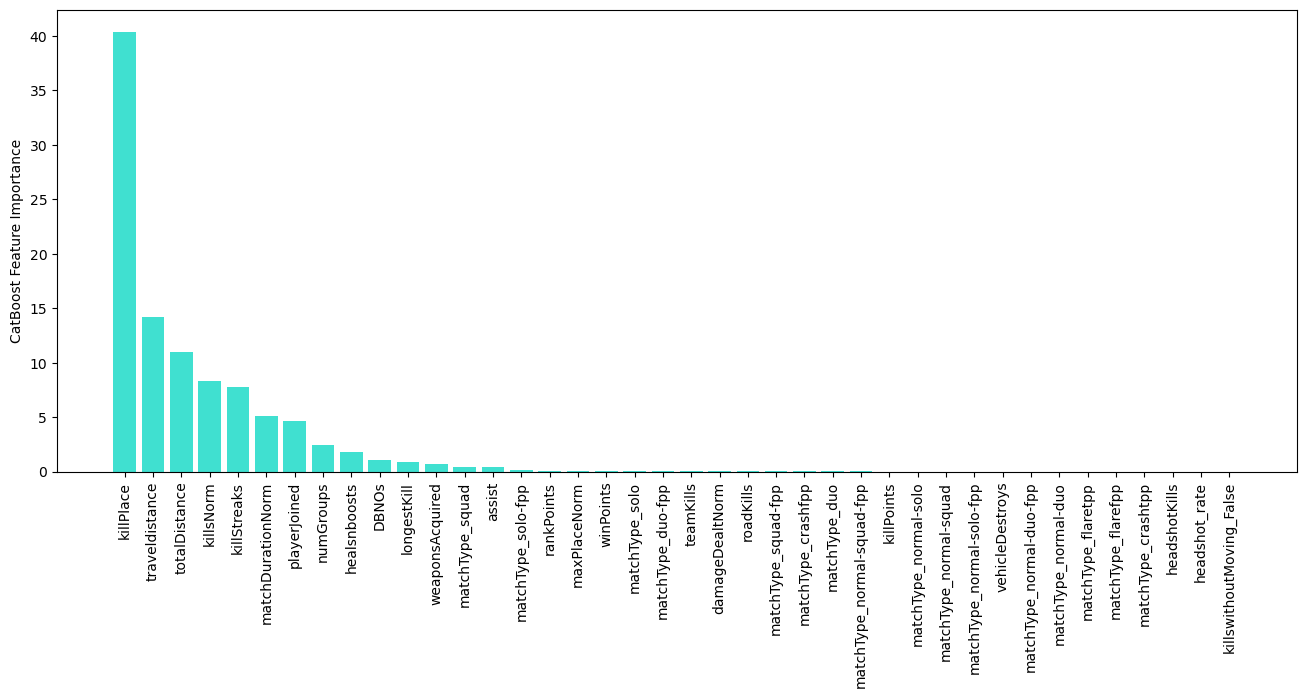

In [78]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

### Prediction

In [79]:
pred = model.predict(xtest)

In [80]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93
